# Matlab으로 데이터 시각화하기

**데이터를 보기좋게 표현해봅시다.**

#### 1. Matplotlib 시작하기
   
#### 2. 자주 사용되는 Plotting의 Options
- 크기 : `figsize`
- 제목 : `title`
- 라벨 : `_label`
- 눈금 : `_tics`
- 범례 : `legend`
  
#### 3. Matplotlib Case Study
- 꺾은선 그래프 (Plot)
- 산점도 (Scatter Plot)
- 박스그림 (Box Plot)
- 막대그래프 (Bar Chart)
- 원형그래프 (Pie Chart)
  
#### 4. The 멋진 그래프, seaborn Case Study
- 커널밀도그림 (Kernel Density Plot)
- 카운트그림 (Count Plot)
- 캣그림 (Cat Plot)
- 스트립그림 (Strip Plot)
- 히트맵 (Heatmap)
  

## I. Matplotlib 시작하기

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline


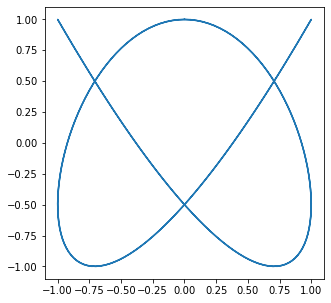

In [41]:
end = np.pi*2
plt.figure(figsize=(5,5))
plt.plot(np.sin(3*np.linspace(0,end,200)), np.cos(4*np.linspace(0,end,200)))
plt.show()

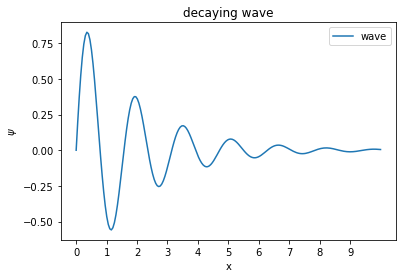

In [42]:
f = lambda x: np.e**(-x/2)*np.sin(4*x)
x = np.linspace(0, 10, 200)

plt.title('decaying wave')
plt.xlabel('x')
plt.ylabel('$\psi$')
plt.xticks(range(0,10,1))
plt.yticks(np.arange(-1,1,0.25))
plt.plot(x, f(x), label='wave')
plt.legend()

plt.show()

## II. Matplotlib Case Study

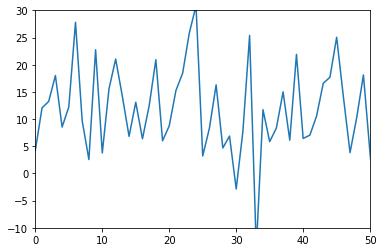

In [54]:
normal_pool = np.random.normal(loc=10, scale=10, size=100)
x = np.arange(0,100)
plt.axis([0,50, -10,30])
plt.yticks(range(-10, 35, 5))
plt.plot(x , normal_pool)
plt.show()

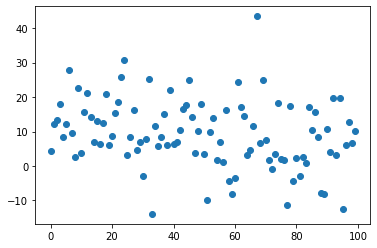

In [62]:
plt.scatter(x, normal_pool)
plt.show()

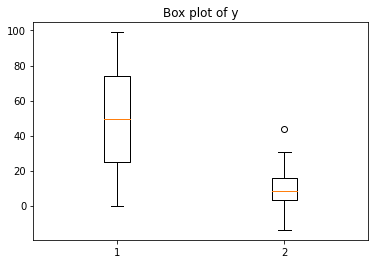

In [63]:
plt.title('Box plot of y')
plt.boxplot((x, normal_pool))
plt.show()

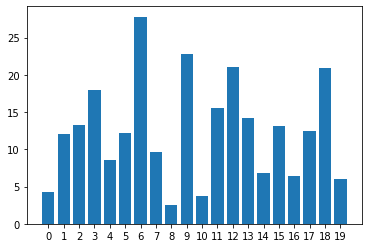

In [69]:
plt.bar(range(20), normal_pool[:20])
plt.xticks(np.arange(0,20,1))
plt.show()

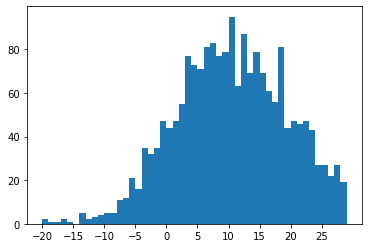

In [74]:
normal_pool = np.random.normal(10, 100, 10000)
samples_mean = np.mean([np.random.choice(normal_pool, 100, replace=False)
                        for i in range(2000)], axis=1)

plt.hist(samples_mean, bins=np.arange(-20, 30, 1))
plt.xticks(np.arange(-20,30,5))
plt.show()


## III. Matplotlib Case Study

## IV. The 멋진 그래프, Seaborn Case Study

In [75]:
import seaborn as sns

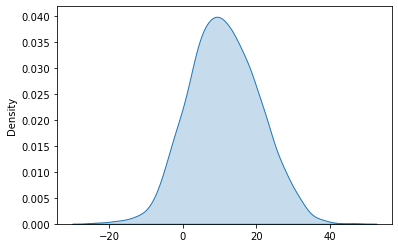

In [78]:
sns.kdeplot(samples_mean, shade=True)
plt.show()

In [92]:
df = pd.read_csv('train.csv')
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [98]:
class_count = df[['Pclass', 'Survived']].groupby('Pclass').count()
class_count

,Survived
Pclass,
1,216
2,184
3,491


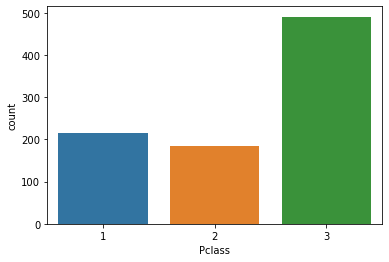

In [106]:
sns.countplot(x=class_count['Pclass'])
plt.show()

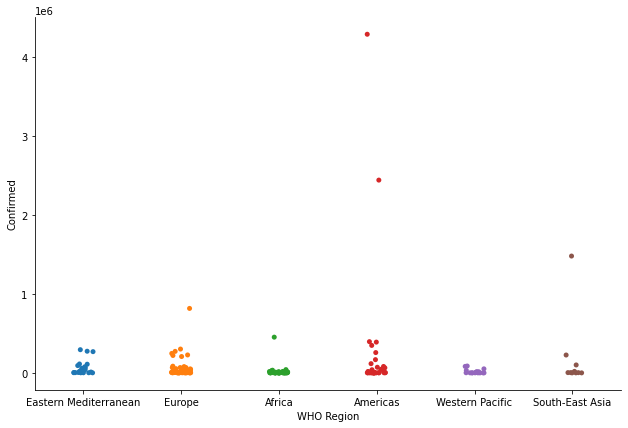

In [108]:
covid = pd.read_csv('country_wise_latest.csv')
s = sns.catplot(x='WHO Region', y='Confirmed', data=covid, kind='strip')
s.fig.set_size_inches(10,6)
plt.show()


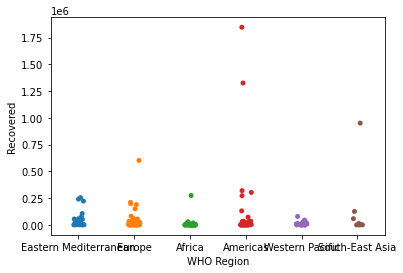

In [111]:
sns.stripplot(x='WHO Region', y='Recovered', data=covid)
plt.show()

C:\Users\bluesun\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\bluesun\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 69.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\bluesun\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\bluesun\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\bluesun\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.2% of 

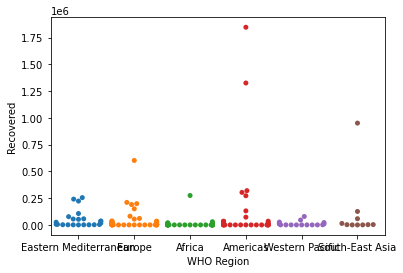

In [112]:
sns.swarmplot(x='WHO Region', y='Recovered', data=covid)
plt.show()


<AxesSubplot:>

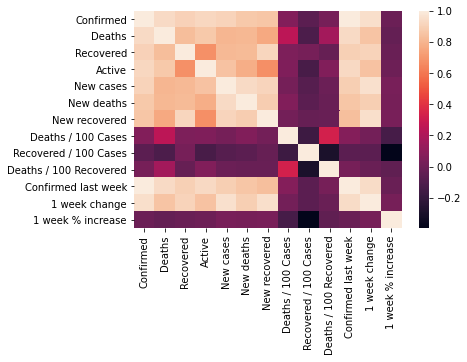

In [114]:
sns.heatmap(covid.corr())

## Mission:

### 